**<font color=skyblue>主成分分析的初步實驗（Principal Component Analysis Experiment）</font>**

- 透過知名資料集來實驗主成分分析（PCA）的原理與應用。
- 了解 PCA 如何將高維資料投影到較低維的空間，同時保留資料的主要變異性。
- 了解 PCA 的應用場景與應用範例。


參考講義：https://ntpuccw.blog/python-in-learning/sml-lesson-5-%e4%b8%bb%e6%88%90%e5%88%86%e5%88%86%e6%9e%90%e7%9a%84%e5%8e%9f%e7%90%86%e8%88%87%e5%af%a6%e9%a9%97/


<hr>
<font color=yellow>範例 1 </font>

RandMcNally Places Rated Almanac 提供了一組美國城市生活品質的調查資料，含 329 個城市的 9 個評量項目的分數。我們可以這些數字裡看到什麼訊息？如何觀察這麼多(9×329)數字資料？能藉助哪些統計圖與表呢？又該計算哪些統計量呢？主成分分析能幫上甚麼忙呢？

Data: https://ntpuccw.blog/wp-content/uploads/2023/02/city_quality.xlsx

<hr>

Importing necessary packages:

In [41]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter


1. 首先讀取資料檔案

In [ ]:
df = pd.read_excel('data/city_quality.xlsx')
df.head() # first 5 rows
df.shape # dimensions
df.info() # data types, missing values
df.describe() # summary statistics

,climate,housing,health,crime,transportation,education,arts,recreation,economics
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


2. 繪製統計圖：透過圖形來觀察資料的全貌，譬如每個評比項目的盒鬚圖（Box plot）與項目間的相關性矩陣圖（Correlation matrux ）。

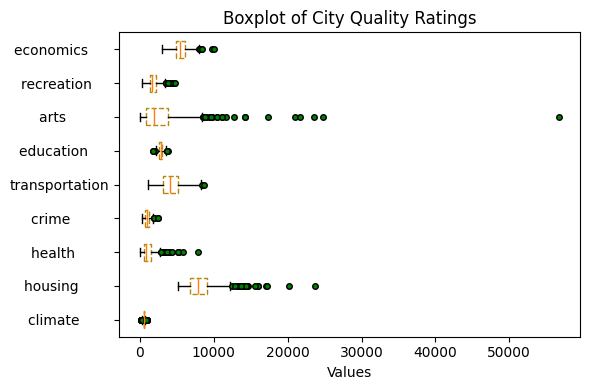

In [30]:
ratings = np.array(df)
categories = df.columns

fig, ax = plt.subplots(figsize = (6, 4))
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

ax.boxplot(ratings, boxprops = boxprops, flierprops = flierprops, \
    tick_labels=categories, vert = False)
ax.set_xlabel('Values')
ax.set_title('Boxplot of City Quality Ratings')
plt.tight_layout()
plt.show()

3. 修正資料矩陣（if necessary），譬如標準化（Normalization）。並回答下列問題

- 資料需要標準化的理由是 ...
- 資料矩陣若不標準化，會發生甚麼問題 ...
- 資料如何標準化 ...

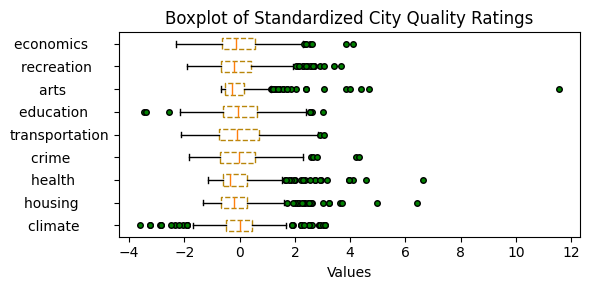

In [35]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply standardization to dataset.
ratings_ = scaler.transform(ratings)

fig, ax = plt.subplots(figsize = (6, 3))
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

ax.boxplot(ratings_, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = categories, vert = False)
ax.set_xlabel('Values')
ax.set_title('Boxplot of Standardized City Quality Ratings')
plt.tight_layout()
plt.show()

繪製相關性矩陣圖並回答下列問題

- 相關性矩陣圖有甚麼用？
- 與主成分分析的關係？

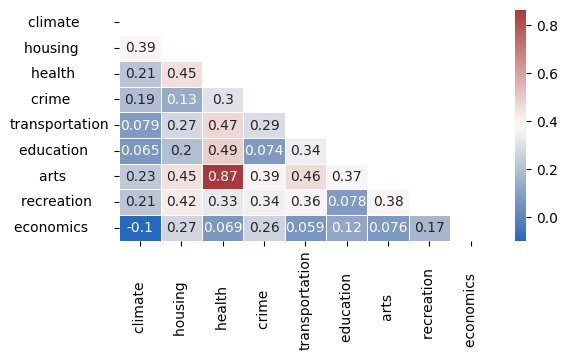

In [37]:
import seaborn

fig, ax = plt.subplots(figsize = (6, 3))
df = pd.DataFrame(ratings_, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag', linewidths=0.5)

# setting heatmap properties
# cmap = seaborn.color_palette('vlag', as_cmap = True)
# mask = np.triu(np.ones_like(R, dtype = bool)) # diagonal mask 
# cbar_kws = dict({'shrink': 0.5})
# annot_kws = dict({'ha': 'center', 'va': 'center', 'size': 8})
# seaborn.heatmap(R, annot = True, annot_kws = annot_kws, mask = mask,\
#             cmap = cmap, center = 0, square = True,\
#             linewidths = .5, cbar_kws=cbar_kws)
plt.show()

4. 主成分分析

- 想達到甚麼目的？

PCA 手冊：https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

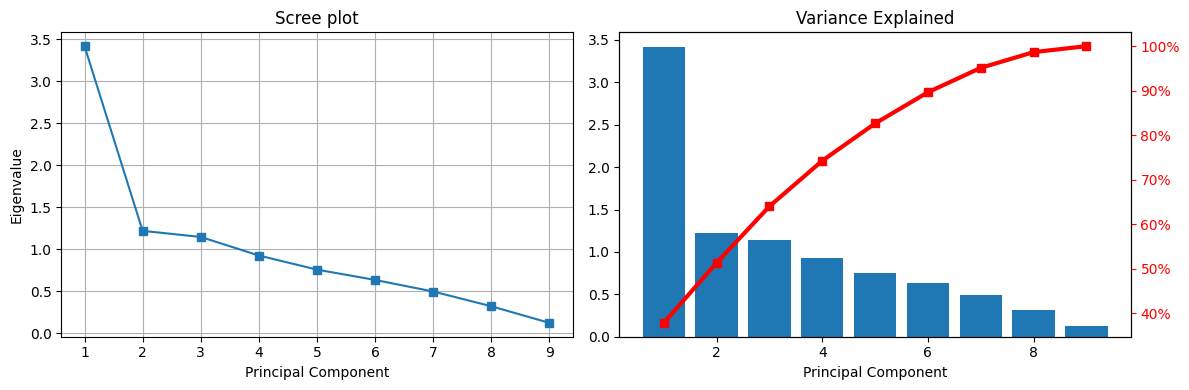

In [ ]:

# Note that the data is already standardized, so we can directly apply PCA to ratings_.
pca = PCA().fit(ratings_)
# print(pca.explained_variance_ratio_) # ratio of eigenvalues
# print(pca.explained_variance_) # eigenvalues of sample covariance matrix
# print(pca.components_)  # eigenvectors
# print(pca.mean_) # mean vector of data matrix X

eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column [v1 v2]
# x_bar = pca.mean_
# create a 1x2 subplot to show the scree plot and the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 
x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker='s')
ax[0].set_title('Scree plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')
ax[0].grid(True)
ax[1].bar(x, eigvals)
ax2 = ax[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum()*100, \
         marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Variance Explained')
plt.tight_layout()
plt.show()

觀察主成分的"樣子"，並查證理論的說法（加強對理論的了解）

- 是否考慮去除 outliers？
- 看得出主成分的獨立性？
- 原變數的變異數和 = 主成分之變異數和（總變異不變=能量不變）

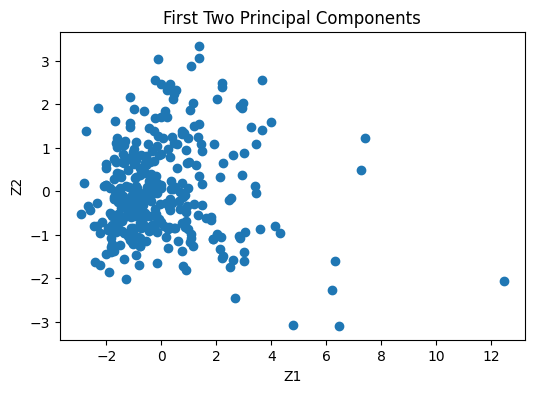

Sum of the eigenvalues: 9.02743902439024
Sum of the variances of original variables: 9.027439024390244


In [39]:
# Show thw first two components Z1, Z2
Z = pca.transform(ratings_)
plt.figure(figsize=(6, 4))
plt.scatter(Z[:,0], Z[:,1])
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title('First Two Principal Components')
plt.show()

# 原變數之變異數和 = 主成分之變異數和
print('Sum of the eigenvalues:', eigvals.sum())
print('Sum of the variances of original variables:', \
      np.diag(np.cov(ratings_.T)).sum())

<font color=orange>結論：、、、</font>



<hr>
<font color=yellow>範例 2 </font>

G. P. Frets 在 1921 主持一項名為 “Heredity of Head Form in Man” （男人頭顱形狀的遺傳研究）的實驗。該研究蒐集了來自 25 的家庭的長子與次子的 head length 與 head breadth。研究目的為：

- How physical traits — specifically head shape—are inherited.
- Whether siblings show similar cranial dimensions.
- How strongly head form correlates within families.

本案例想從 PCA 的角度來探討上述的問題。

資料下載：https://ntpuccw.blog/wp-content/uploads/2024/01/data_son_football.zip 解壓縮後取 son.txt

<hr>

Load data

In [ ]:
D = np.loadtxt('data/son.txt', comments='%')
# X = D[:, 0:2]
df = pd.DataFrame(D, columns=['X1', 'X2', 'Y1', 'Y2'])
df.head()

觀察甚麼統計圖形才有幫助：

- Boxplot
- Correlation matrix
- Scatter plot between two variables

In [ ]:
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag', linewidths=0.5)
plt.show()

In [ ]:
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(df.values)
# Apply standardization to dataset.
df_scaled = scaler.transform(df.values)
pca = PCA().fit(df_scaled)

eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column [v1 v2]
# x_bar = pca.mean_
# create a 1x2 subplot to show the scree plot and the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 
x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker='s')
ax[0].set_title('Scree plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')
ax[0].grid(True)
ax[1].bar(x, eigvals)
ax2 = ax[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum()*100, \
         marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Variance Explained')
plt.tight_layout()
plt.show()
print(pca.explained_variance_ratio_) # ratio of eigenvalues


呈現資料的特徵：主成分是原始變數的重組，依"能量"遞減。能量高的成分代表原始資料的特徵最明顯

General comments

1. 觀察"能量"最大的主成分 Z1 的組合 Z1 ~ a(X1 + Y1 + X2 + Y2)
    - Families differ mainly in overall cranial size
    - Larger first sons tend to have larger second sons
    - Length and breadth increase together

1. 觀察"能量"次大的主成分 Z2 的組合 Z2 ~ b(X1 - Y1 + X2 - Y2)
    - Some families have relatively long, narrow heads
    - Others have relatively short, broad heads
    - This is a shape dimension, independent of overall size


In [ ]:
plt.figure(figsize=(8, 3))
seaborn.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=df.columns, yticklabels=np.arange(1,5))
plt.title('Principal Component Loadings')
plt.show()

看看前兩個主成分的散佈圖

In [ ]:
# Show thw first two components Z1, Z2
Z = pca.transform(df_scaled)[:, :2]
plt.figure(figsize=(6, 3))
plt.scatter(Z[:,0], Z[:,1])
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.title('First Two Principal Components')
plt.xlim(-4, 6)
plt.ylim(-2, 2)
plt.grid(True)
plt.show()

<font color=orange>結論：、、、</font>



<hr>

<font color=yellow>範例 3</font>：按前述範例自行探討本範例

一組「60 名美國大學 football 球員的六項頭圍數據」，來自一項頭部尺寸與美式足球安全性相關的初步研究。研究的核心目的為了了解不同球員的頭型特徵，並評估這些特徵是否與頭盔貼合度、衝擊力傳遞方式，以及可能造成的頸部傷害風險有關。六項數據包括：

- WDIM: head width at widest dimension 頭部寬度
- CIRCUM:head circumference 頭圍
- FBEYE:front-to-back measurement at eye level 前後長度
- EYEHD:eye-to-top-of-head measurement 眼到頭頂距離
- EARHD:ear-to-top-of-headmeasurement 耳到頭頂距離
- JAW:jaw width - 下顎寬度

如何用 PCA 分析這組資料？能得出甚麼訊息？

資料下載：同前範例，但開啟 FOOTBALL.txt



<hr>
<font color=yellow>範例 4：小麥種子資料集（Seeds Dataset）</font>

This repository contains the Seeds Dataset from the UCI Machine Learning Repository. The dataset includes 210 measurements of 7 geometrical properties of kernels belonging to three different varieties of wheat（Kama, Rosa, Canadian）

The 7 attributes are:
- Area
- Perimeter
- Compactness
- Length of kernel
- Width of kernel
- Asymmetry coefficient
- Length of kernel groove


資料來源：https://archive.ics.uci.edu/dataset/236/seeds


In [ ]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df = pd.read_csv('../Data/seeds_dataset.txt', names = cols, sep='\s+')
# df.head()
df.tail()

In [ ]:
# exclude the class label
# assign the last column as labels
labels = df.iloc[:, -1]
df = df.iloc[:, :-1] 
attributes = df.columns


In [ ]:
# standardize the data
scaler = StandardScaler()
scaler.fit(df.values)
df_scaled = scaler.transform(df.values)

fig, ax = plt.subplots(1, 2, figsize=(9, 3), sharey = True)
boxprops = dict(linestyle = '--', linewidth = 1, color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green', 
    markersize = 4, linestyle = 'none') 

# two boxplots share the same y-axis
ax[0].boxplot(df.values, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = attributes, vert = False)
ax[0].set_title('Original Data')

ax[1].boxplot(df_scaled, boxprops = boxprops, flierprops = flierprops, \
    tick_labels = attributes, vert = False)
ax[1].set_title('Standardized Data')
plt.show()


In [ ]:
plt.figure(figsize = (4, 4))
R = df.corr() # corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask 
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag', linewidths=0.5)
plt.show()

In [ ]:
pca = PCA().fit(df_scaled)

eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column [v1 v2]
# x_bar = pca.mean_
# create a 1x2 subplot to show the scree plot and the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(12, 4)) 
x = np.arange(1, 1+len(eigvals))
ax[0].plot(x, eigvals, marker='s')
ax[0].set_title('Scree plot')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Eigenvalue')
ax[0].grid(True)
ax[1].bar(x, eigvals)
ax2 = ax[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum()*100, \
         marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax[1].set_xlabel('Principal Component')
ax[1].set_title('Variance Explained')
plt.tight_layout()
plt.show()
print(pca.explained_variance_ratio_) # ratio of eigenvalues

In [ ]:
Z = pca.transform(df_scaled)[:, :2]
classes = ['Kama', 'Rosa', 'Canadian']
colors = ['red', 'green', 'blue']
# Show the first two principal components Z1, Z2 with and without class labels in the same figure
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for i in np.arange(1, 4):
    ax[0].scatter(Z[labels == i, 0], Z[labels == i, 1], \
                marker='.', color=colors[i-1], label=classes[i-1])
ax[0].set_xlabel('Z1')
ax[0].set_ylabel('Z2')
ax[0].set_title('First Two Principal Components')
ax[0].set_xlim(-4, 6)
ax[0].set_ylim(-4, 4)
ax[0].grid(True)
ax[0].legend()
ax[1].scatter(Z[:,0], Z[:,1], marker='.', color='gray')
ax[1].set_xlabel('Z1')
ax[1].set_ylabel('Z2')
ax[1].set_title('First Two Principal Components')
ax[1].set_xlim(-4, 6)
ax[1].set_ylim(-4, 4)
ax[1].grid(True)
plt.show()

In [ ]:
# plot the loadings of the first two principal components
plt.figure(figsize=(8, 3))
seaborn.heatmap(pca.components_, cmap='coolwarm', annot=True, xticklabels=df.columns, yticklabels=np.arange(1,5))
plt.title('Principal Component Loadings')
plt.show()